# 4.10 Coding Etiquette & Excel Reporting Part 2

### This script contains the following points:
#### 1. Import resources
#### 2. Create an appropriate visualization to show the distribution of profiles
#### 3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 4. Compare the customer profiles with regions and departments
#### 5. Produce suitable charts to illustrate results and export them

### 1. Import resources

In [1]:
# Import libs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set a path variable for the import
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\10-2023 Instacart Basket Analysis'

In [3]:
# Import data set
op_with_profiles = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'op_with_profiles.pkl'))

In [7]:
pd.set_option('display.max_columns', None)
op_with_profiles.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prods_price,spending_flag,median_days_since_prior_order,regularity_flag,gender,state,age,n_dependents,fam_status,income,region,age_group,income_group,department,dependents_status,customer_profile
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies)
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies)
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies)
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies)
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busiest day,Least busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies)


### 2. Create an appropriate visualization to show the distribution of profiles

##### Visualize "age_group"

In [4]:
op_with_profiles['age_group'].value_counts(dropna=False)

age_group
18-29    5817603
70-81    5812883
40-49    4883179
30-39    4847507
50-59    4841771
60-69    4761621
Name: count, dtype: int64

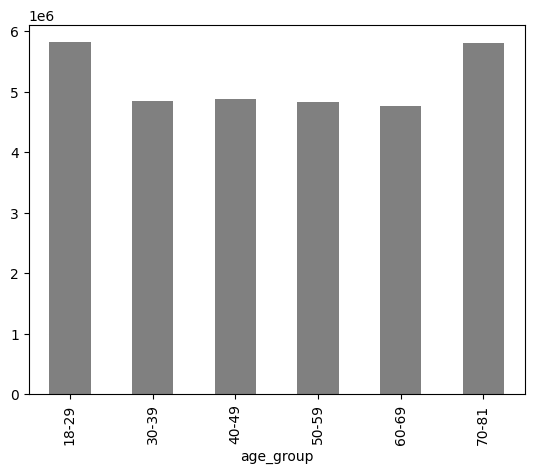

In [35]:
bar_age_group = op_with_profiles['age_group'].value_counts().reindex(['18-29', '30-39', '40-49', '50-59', '60-69', '70-81']).plot.bar(color = 'grey')

In [31]:
# Export the chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))

##### Visualize "income_group"

In [5]:
op_with_profiles['income_group'].value_counts(dropna=False)

income_group
High            14207028
Upper Middle     6850802
Lower Middle     6544180
Low              3362554
Name: count, dtype: int64

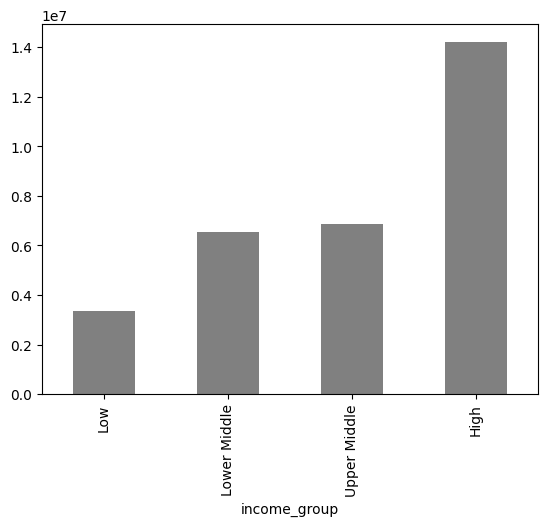

In [33]:
bar_income_group = op_with_profiles['income_group'].value_counts().reindex(['Low', 'Lower Middle', 'Upper Middle', 'High']).plot.bar(color = 'grey')

In [36]:
# Export the chart
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_group.png'))

##### Visualize "department"

In [6]:
op_with_profiles['department'].value_counts(dropna=False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

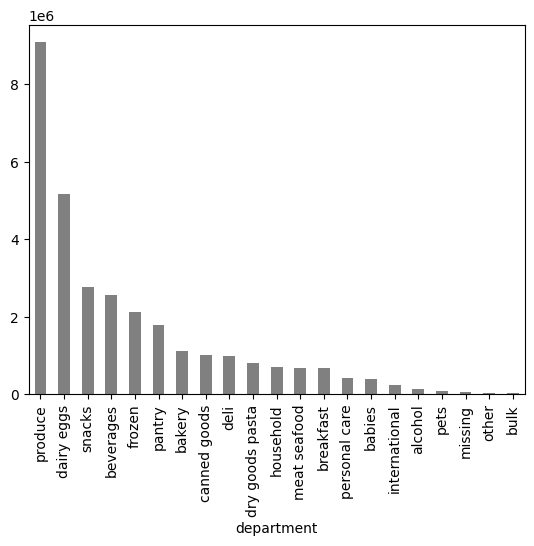

In [133]:
bar_department = op_with_profiles['department'].value_counts().plot.bar(color = 'grey')

In [39]:
# Export the chart
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department.png'))

##### Visualize "dependents_status"

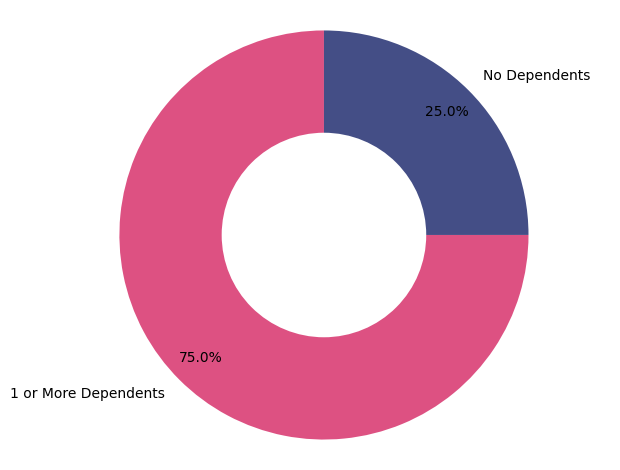

In [128]:
color_pie = {'#444e86', '#dd5182'}
pie_dependents = op_with_profiles['dependents_status'].value_counts().plot.pie(label='', pctdistance=0.85, startangle = 90, autopct='%1.1f%%', colors=color_pie)

#draw circle
centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
pie_dependents.axis('equal')  
plt.tight_layout()
plt.show()

In [129]:
# Export the chart
pie_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependents.png'))

##### Visualize "customer_profile"

In [4]:
op_with_profiles['customer_profile'].value_counts(dropna=False)

customer_profile
Married household without baby(ies)               14854327
Married household with baby(ies)                   6889384
Single household without baby(ies)                 5283590
Single household with baby(ies)                    2456091
Two-or-more person household without baby(ies)     1016394
Two-or-more person household with baby(ies)         464778
Name: count, dtype: int64

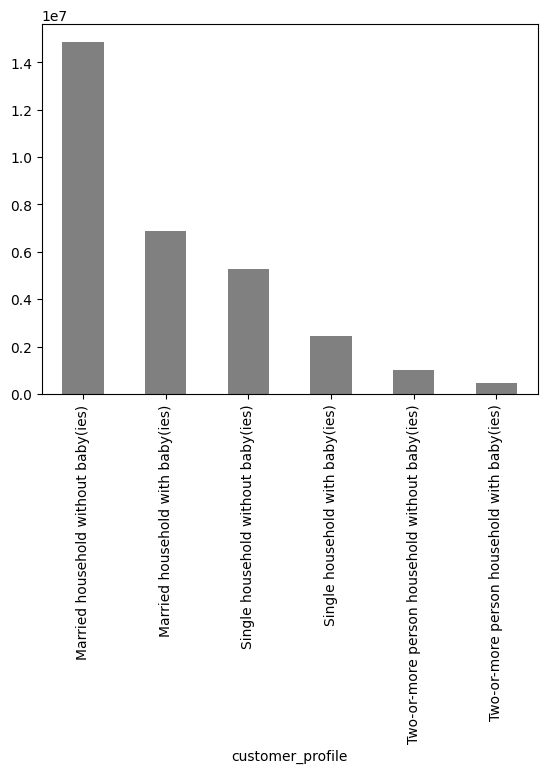

In [5]:
bar_cprofile = op_with_profiles['customer_profile'].value_counts().plot.bar(color = 'grey')

In [6]:
# Export the chart
bar_cprofile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cprofile.png'))

### 3. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [7]:
# Create a subset containing only relevant columns
df_agg = op_with_profiles[['customer_profile', 'max_order', 'prices']]

In [8]:
df_agg.shape

(30964564, 3)

In [9]:
# aggregate the column values by customer_profile, and calculate the max, mean and min values of the aggregation
df_agg.groupby('customer_profile').agg({'max_order':['min', 'max', 'mean'], 'prices':['min', 'max', 'mean']})

max_order                 \
                                                     min max       mean   
customer_profile                                                          
Married household with baby(ies)                       5  99  41.909421   
Married household without baby(ies)                    5  99  30.781804   
Single household with baby(ies)                        5  99  42.920409   
Single household without baby(ies)                     5  99  30.843328   
Two-or-more person household with baby(ies)            5  99  42.758893   
Two-or-more person household without baby(ies)         5  99  31.237885   

                                               prices                  
                                                  min   max      mean  
customer_profile                                                       
Married household with baby(ies)                  1.0  25.0  7.831758  
Married household without baby(ies)               1.0  25.0  7.771039  
Single household with baby(ies)                   1.0  25.0  7.835119  
Single household without baby(ies)                1.0  25.0  7.768366  
Two-or-more person household with baby(ies)       1.0  25.0  7.847665  
Two-or-more person household without baby(ies)    1.0  25.0  7.779083

### 4. Compare the customer profiles with regions and departments

In [10]:
op_with_profiles.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,n_dependents,fam_status,income,region,age_group,income_group,department,dependents_status,customer_profile,baby_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies)
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies)
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies)
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies)
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies)


##### Link between customer_profile and region

In [105]:
# Create a crosstab from region and customer_profile
cprofile_region = pd.crosstab(op_with_profiles['region'], op_with_profiles['customer_profile'], dropna=False)

In [106]:
cprofile_region

customer_profile,Married household with baby(ies),Married household without baby(ies),Single household with baby(ies),Single household without baby(ies),Two-or-more person household with baby(ies),Two-or-more person household without baby(ies)
region,,,,,,
Midwest,1600799,3486463,595638,1227178,106844,244591
Northeast,1235230,2618543,434399,920083,79450,176980
South,2296643,4927106,811604,1770329,162207,343250
West,1756712,3822215,614450,1366000,116277,251573


In [101]:
# Create a normalized crosstab from region and customer_profile
cprofile_region_normalized = pd.crosstab(op_with_profiles['region'], op_with_profiles['customer_profile'], normalize= 'index', dropna=False)

In [102]:
cprofile_region_normalized

customer_profile,Married household with baby(ies),Married household without baby(ies),Single household with baby(ies),Single household without baby(ies),Two-or-more person household with baby(ies),Two-or-more person household without baby(ies)
region,,,,,,
Midwest,0.220450,0.480129,0.082027,0.168998,0.014714,0.033683
Northeast,0.226039,0.479175,0.079492,0.168369,0.014539,0.032386
South,0.222734,0.477843,0.078711,0.171691,0.015731,0.033289
West,0.221605,0.482163,0.077511,0.172318,0.014668,0.031735


In [13]:
# Set a color palette for the chart
colors = ['#003f5c','#444e86','#955196','#dd5182', '#ff6e54', '#ffa600']

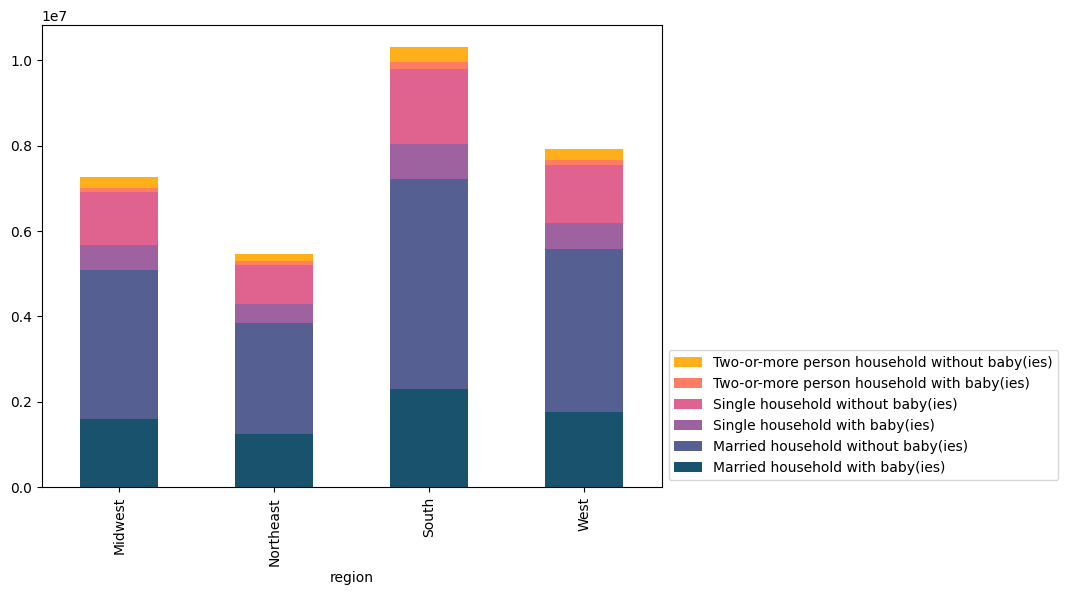

In [109]:
# Create the stacked bar chart
cprofile_region_stacked_bar = cprofile_region.plot.bar(stacked=True, color = colors, alpha = 0.9, figsize=(8,6))
# Reverse legend order to match the chart visuals
handles, labels = cprofile_region_stacked_bar.get_legend_handles_labels()
cprofile_region_stacked_bar.legend(handles[::-1], labels[::-1], loc='lower left', bbox_to_anchor=(1, 0))

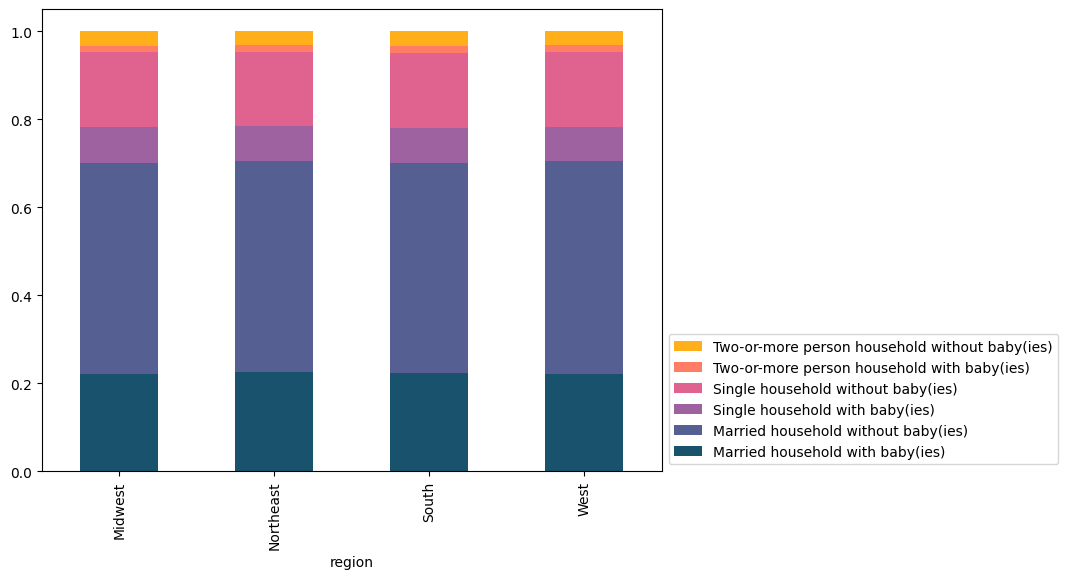

In [108]:
# Create the stacked bar chart
cprofile_region_stacked_bar_normalized = cprofile_region_normalized.plot.bar(stacked=True, color = colors, alpha = 0.9, figsize=(8,6))
# Reverse legend order to match the chart visuals
handles, labels = cprofile_region_stacked_bar_normalized.get_legend_handles_labels()
cprofile_region_stacked_bar_normalized.legend(handles[::-1], labels[::-1], loc='lower left', bbox_to_anchor=(1, 0))

In [110]:
# Export the chart
cprofile_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cprofile_region_stacked_bar.png'))
cprofile_region_stacked_bar_normalized.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cprofile_region_stacked_bar_Normalized.png'))

- The South region has the highest amount of customers, while the Northeast region has the lowest. 
- Most customers are from married households without babies, followed by married households without babies, and single households without babies.
- Despite differences in population, the distribution of customer profile stays consistent among all regions.

##### Link between customer_profile and departments

In [16]:
# Create a crosstab from region and customer_profile
cprofile_dept = pd.crosstab(op_with_profiles['department'], op_with_profiles['customer_profile'], dropna=False)

In [17]:
cprofile_dept

customer_profile,Married household with baby(ies),Married household without baby(ies),Single household with baby(ies),Single household without baby(ies),Two-or-more person household with baby(ies),Two-or-more person household without baby(ies)
department,,,,,,
alcohol,13833,85588,6154,30673,1194,7185
babies,287683,0,103328,0,19381,0
bakery,255545,530204,92334,189061,17810,35874
beverages,456427,1351026,163403,481938,31021,88086
breakfast,147871,323349,52282,114150,10658,22540
bulk,7009,16809,2217,5783,493,1140
canned goods,224322,488255,79205,171815,15140,33337
dairy eggs,1211919,2420680,430169,864207,83315,166892
deli,212116,490217,77040,176342,15096,33023


To better show the visuals, I further group the fam_status into three categories:
1. Married Household
2. Single Household
3. Two-or-more person Household

In [4]:
op_with_profiles['fam_status'].value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [5]:
# Find and group customers as "Married household"
op_with_profiles.loc[op_with_profiles['fam_status'] == 'married', 'househould_type'] = 'Married household'

In [6]:
# Find and group customers as "Single household"
op_with_profiles.loc[(op_with_profiles['fam_status'] == 'single') | (op_with_profiles['fam_status'] == 'divorced/widowed'), 'househould_type'] = 'Single household'

In [7]:
# Find and group customers as "Two-or-more person household"
op_with_profiles.loc[op_with_profiles['fam_status'] == 'living with parents and siblings', 'househould_type'] = 'Two-or-more person household'

In [8]:
# Check the results
op_with_profiles['househould_type'].value_counts(dropna=False)

househould_type
Married household               21743711
Single household                 7739681
Two-or-more person household     1481172
Name: count, dtype: int64

In [9]:
# Create a normalized multi-index crosstab from household_type, customer_profile, and department
df_crosstab = pd.crosstab([op_with_profiles['househould_type'], op_with_profiles['customer_profile']], op_with_profiles['department'], normalize='index', dropna=True)

In [10]:
df_crosstab

department                                                                    alcohol  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.002008   
                             Married household without baby(ies)             0.005762   
Single household             Single household with baby(ies)                 0.002506   
                             Single household without baby(ies)              0.005805   
Two-or-more person household Two-or-more person household with baby(ies)     0.002569   
                             Two-or-more person household without baby(ies)  0.007069   

department                                                                     babies  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.041757   
                             Married household without baby(ies)             0.000000   
Single household             Single household with baby(ies)                 0.042070   
                             Single household without baby(ies)              0.000000   
Two-or-more person household Two-or-more person household with baby(ies)     0.041699   
                             Two-or-more person household without baby(ies)  0.000000   

department                                                                     bakery  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.037093   
                             Married household without baby(ies)             0.035694   
Single household             Single household with baby(ies)                 0.037594   
                             Single household without baby(ies)              0.035783   
Two-or-more person household Two-or-more person household with baby(ies)     0.038319   
                             Two-or-more person household without baby(ies)  0.035295   

department                                                                   beverages  \
househould_type              customer_profile                                            
Married household            Married household with baby(ies)                 0.066251   
                             Married household without baby(ies)              0.090952   
Single household             Single household with baby(ies)                  0.066530   
                             Single household without baby(ies)               0.091214   
Two-or-more person household Two-or-more person household with baby(ies)      0.066744   
                             Two-or-more person household without baby(ies)   0.086665   

department                                                                   breakfast  \
househould_type              customer_profile                                            
Married household            Married household with baby(ies)                 0.021464   
                             Married household without baby(ies)              0.021768   
Single household             Single household with baby(ies)                  0.021287   
                             Single household without baby(ies)               0.021605   
Two-or-more person household Two-or-more person household with baby(ies)      0.022931   
                             Two-or-more person household without baby(ies)   0.022176   

department                                                                       bulk  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.001017   
                             Married household without baby(ies)             0.001132   
Single household             Single household with baby(ies)   

In [11]:
# Separate the married households from the crosstab and transpose the result
df_married = df_crosstab.loc['Married household'].T
df_married

customer_profile,Married household with baby(ies),Married household without baby(ies)
department,,
alcohol,0.002008,0.005762
babies,0.041757,0.000000
bakery,0.037093,0.035694
beverages,0.066251,0.090952
breakfast,0.021464,0.021768
bulk,0.001017,0.001132
canned goods,0.032561,0.032870
dairy eggs,0.175911,0.162961
deli,0.030789,0.033002


In [14]:
# Separate the single households from the crosstab and transpose the result
df_single = df_crosstab.loc['Single household'].T
df_single

customer_profile,Single household with baby(ies),Single household without baby(ies)
department,,
alcohol,0.002506,0.005805
babies,0.042070,0.000000
bakery,0.037594,0.035783
beverages,0.066530,0.091214
breakfast,0.021287,0.021605
bulk,0.000903,0.001095
canned goods,0.032248,0.032519
dairy eggs,0.175144,0.163564
deli,0.031367,0.033375


In [18]:
# Separate the two-or-more-person households from the crosstab and transpose the result
df_ToM = df_crosstab.loc['Two-or-more person household'].T
df_ToM

customer_profile,Two-or-more person household with baby(ies),Two-or-more person household without baby(ies)
department,,
alcohol,0.002569,0.007069
babies,0.041699,0.000000
bakery,0.038319,0.035295
beverages,0.066744,0.086665
breakfast,0.022931,0.022176
bulk,0.001061,0.001122
canned goods,0.032575,0.032799
dairy eggs,0.179258,0.164200
deli,0.032480,0.032490


In [12]:
color_bar = ['#444e86', '#dd5182']

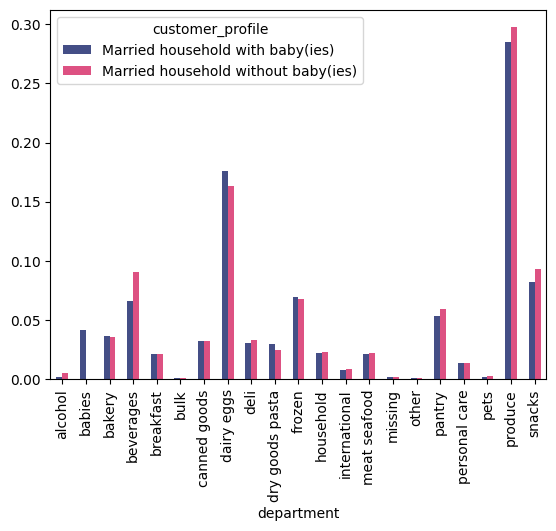

In [20]:
# Create a bar plot for married households
df_married_bar = df_married.plot(kind='bar', color = color_bar)

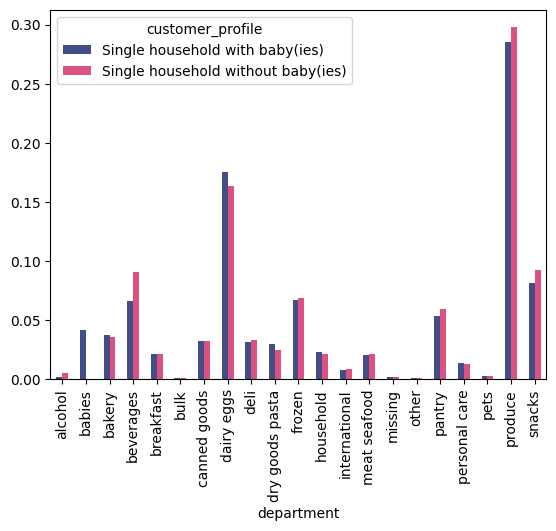

In [21]:
# Create a bar plot for single households
df_single_bar = df_single.plot(kind='bar', color = color_bar)

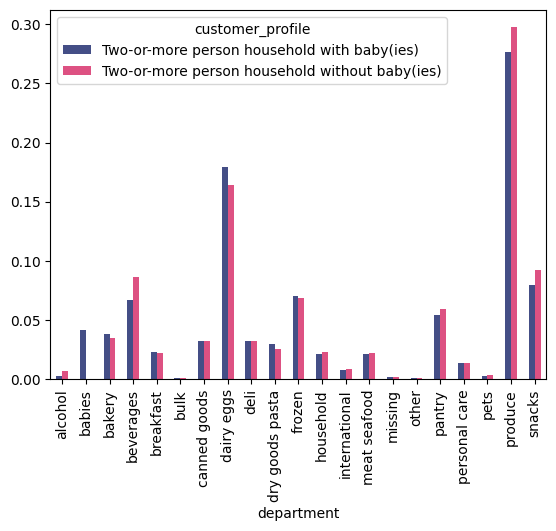

In [25]:
# Create a bar plot for two-or-more-person households
df_ToM_bar = df_ToM.plot(kind='bar', color = color_bar)

In [96]:
# Export the plots
df_married_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_married.png'))
df_single_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_single.png'))
df_ToM_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_ToM.png'))

Looking at the plots, we can see a consistent pattern that 
- families with babies tend to buy more diary eggs, and obviously, baby products.
- families without babies tend to buy more alcohol, beverages, pantry, produce and snacks.

### 5. Produce suitable charts to illustrate results and export them

In [138]:
op_with_profiles.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,fam_status,income,region,age_group,income_group,department,dependents_status,customer_profile,baby_flag,househould_type
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies),Married household
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies),Married household
2,473747,1,prior,3,3,12,21.0,196,1,1,...,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies),Married household
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies),Married household
4,431534,1,prior,5,4,15,28.0,196,1,1,...,married,40423,South,30-39,Low,beverages,1 or More Dependents,Married household without baby(ies),without baby(ies),Married household


In [142]:
# Create a normalized multi-index crosstab from household_type, customer_profile, and department
df_crosstab_2 = pd.crosstab([op_with_profiles['househould_type'], op_with_profiles['customer_profile']], op_with_profiles['age_group'], normalize='index', dropna=True)
df_crosstab_2

age_group                                                                       18-29  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.132113   
                             Married household without baby(ies)             0.133203   
Single household             Single household with baby(ies)                 0.189892   
                             Single household without baby(ies)              0.185712   
Two-or-more person household Two-or-more person household with baby(ies)     1.000000   
                             Two-or-more person household without baby(ies)  1.000000   

age_group                                                                       30-39  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.166128   
                             Married household without baby(ies)             0.167630   
Single household             Single household with baby(ies)                 0.152053   
                             Single household without baby(ies)              0.158888   
Two-or-more person household Two-or-more person household with baby(ies)     0.000000   
                             Two-or-more person household without baby(ies)  0.000000   

age_group                                                                       40-49  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.174069   
                             Married household without baby(ies)             0.166296   
Single household             Single household with baby(ies)                 0.151063   
                             Single household without baby(ies)              0.159496   
Two-or-more person household Two-or-more person household with baby(ies)     0.000000   
                             Two-or-more person household without baby(ies)  0.000000   

age_group                                                                       50-59  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.162447   
                             Married household without baby(ies)             0.168470   
Single household             Single household with baby(ies)                 0.157938   
                             Single household without baby(ies)              0.157505   
Two-or-more person household Two-or-more person household with baby(ies)     0.000000   
                             Two-or-more person household without baby(ies)  0.000000   

age_group                                                                       60-69  \
househould_type              customer_profile                                           
Married household            Married household with baby(ies)                0.167429   
                             Married household without baby(ies)             0.161816   
Single household             Single household with baby(ies)                 0.162516   
                             Single household without baby(ies)              0.152418   
Two-or-more person household Two-or-more person household with baby(ies)     0.000000   
                             Two-or-more person household without baby(ies)  0.000000   

age_group                                                                       70-81  
househould_type              customer_profile                                          
Married household            Married household with baby(ies)                0.197814  
                             Married household without baby(ies)             0.202585  
Single household             Single household with baby(ies)                 0.1865

In [144]:
# Separate the married households from the crosstab and transpose the result
df_married_age = df_crosstab_2.loc['Married household'].T
df_married_age

customer_profile,Married household with baby(ies),Married household without baby(ies)
age_group,,
18-29,0.132113,0.133203
30-39,0.166128,0.167630
40-49,0.174069,0.166296
50-59,0.162447,0.168470
60-69,0.167429,0.161816
70-81,0.197814,0.202585


In [145]:
# Separate the married households from the crosstab and transpose the result
df_single_age = df_crosstab_2.loc['Single household'].T
df_single_age

customer_profile,Single household with baby(ies),Single household without baby(ies)
age_group,,
18-29,0.189892,0.185712
30-39,0.152053,0.158888
40-49,0.151063,0.159496
50-59,0.157938,0.157505
60-69,0.162516,0.152418
70-81,0.186537,0.185982


In [146]:
# Separate the married households from the crosstab and transpose the result
df_ToM_age = df_crosstab_2.loc['Two-or-more person household'].T
df_ToM_age

customer_profile,Two-or-more person household with baby(ies),Two-or-more person household without baby(ies)
age_group,,
18-29,1.0,1.0
30-39,0.0,0.0
40-49,0.0,0.0
50-59,0.0,0.0
60-69,0.0,0.0
70-81,0.0,0.0


In [148]:
# Set the color palette of the bar charts
color_bar_2 = ['#444e86', '#dd5182']

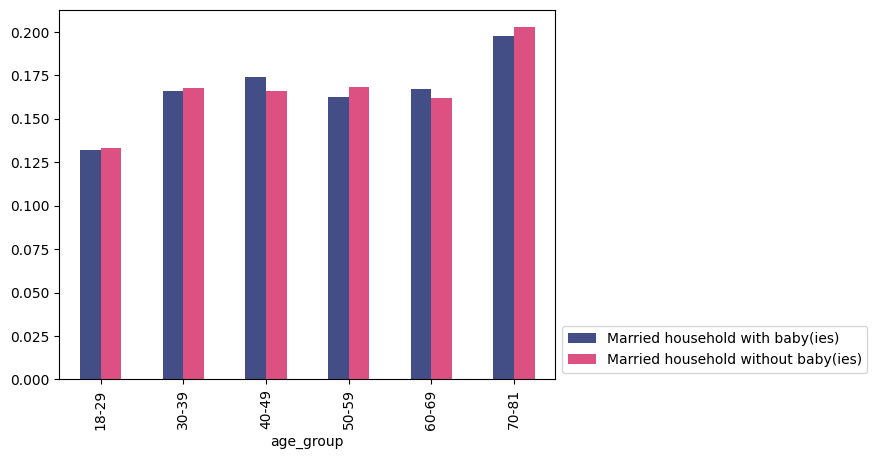

In [152]:
# Create a bar plot for married households
df_married_age_bar = df_married_age.plot(kind='bar', color = color_bar)
df_married_age_bar.legend(loc='lower left', bbox_to_anchor=(1, 0))

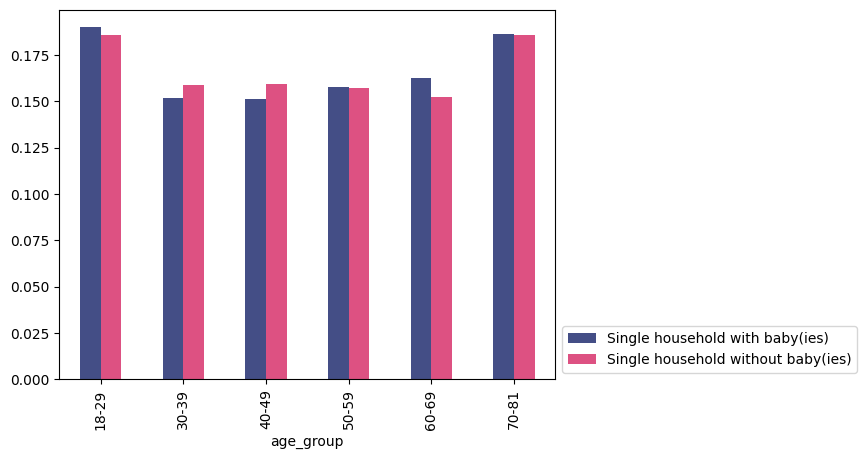

In [153]:
# Create a bar plot for single households
df_single_age_bar = df_single_age.plot(kind='bar', color = color_bar)
df_single_age_bar.legend(loc='lower left', bbox_to_anchor=(1, 0))

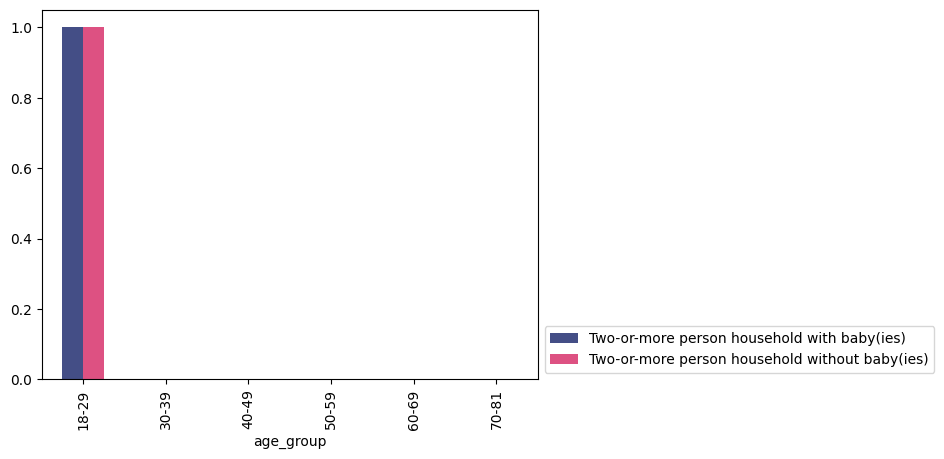

In [154]:
# Create a bar plot for two-or-more-person households
df_ToM_age_bar = df_ToM_age.plot(kind='bar', color = color_bar)
df_ToM_age_bar.legend(loc='lower left', bbox_to_anchor=(1, 0))

In [155]:
# Export the plots
df_married_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_married_age_bar.png'))
df_single_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_single_age_bar.png'))
df_ToM_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_ToM_age_bar.png'))